In [1]:
%matplotlib inline
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import math

import logging

# Enable logging
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
df = pd.read_csv("parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


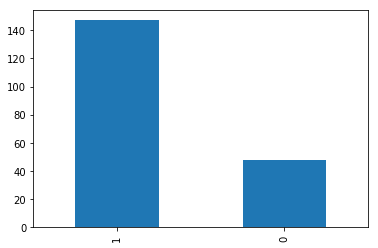

In [4]:
_ = df["status"].value_counts().plot(kind="bar")

In [5]:
data = np.loadtxt("parkinsons.csv",delimiter=',',skiprows=1,usecols=range(1,24))
status = data[:,16]
data = np.delete(data,16,1)
data = np.c_[data,status]
data[0]

array([  1.19992000e+02,   1.57302000e+02,   7.49970000e+01,
         7.84000000e-03,   7.00000000e-05,   3.70000000e-03,
         5.54000000e-03,   1.10900000e-02,   4.37400000e-02,
         4.26000000e-01,   2.18200000e-02,   3.13000000e-02,
         2.97100000e-02,   6.54500000e-02,   2.21100000e-02,
         2.10330000e+01,   4.14783000e-01,   8.15285000e-01,
        -4.81303100e+00,   2.66482000e-01,   2.30144200e+00,
         2.84654000e-01,   1.00000000e+00])

In [6]:
def train_test_split(data,train_rate, shuffle=True):
    
    if shuffle:
        np.random.shuffle(data)
    
    train_size = math.floor(train_rate*data.shape[0])

    train_data = data[0: train_size,:]
    test_data = data[train_size:,:]
    
    return train_data,test_data

In [7]:
train,test = train_test_split(data,.8, shuffle=False)
print("Dados de treino: {}".format(train.shape[0]))
print("Dados de teste: {}".format(test.shape[0]))

Dados de treino: 156
Dados de teste: 39


In [8]:
import abc

class LearningAlgorithm():
    __metaclass__ = abc.ABCMeta
    
    @abc.abstractmethod
    def fit(self,X,Y,itter=100):
        return
    
    @abc.abstractmethod
    def predict(self,X):
        return
    
    @abc.abstractmethod
    def score(self,X,Y):
        return

In [9]:
def euclidian_distance(a,b):
    return np.linalg.norm(a-b)

In [10]:
class NearestCentroideClassifier(LearningAlgorithm):
    
    def __init__(self, distanceAlgorithm=euclidian_distance):
        self.distance = distanceAlgorithm
    
    def fit(self,X,Y,itter=100):   
        classes = {}
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.clusters = {}
        for k in classes:
            data = np.array(classes[k])
            cluster = np.mean(data,axis=0)
            self.clusters[k] = cluster
            
    def predict(self,x):
        distances = [(c,self.distance(x,self.clusters[c])) for c in self.clusters]
        distances = sorted(distances,key=lambda x: x[1])
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [11]:
class ConfusionMatrix():
    def __init__(self,label,predicted):
        self.matrix = np.array([[0,0],[0,0]])
        
        for l,p in zip(label,predicted):
            try:
                l = int(l)
                p = int(p)
                self.matrix[l][p] += 1
            except:
                raise Exception("Invalid value. Values must be 0 or 1")
                
    def true_positive(self):
        return self.matrix[1][1]
    
    def true_negative(self):
        return self.matrix[0][0]
    
    def false_positive(self):
        return self.matrix[0][1]
    
    def false_negative(self):
        return self.matrix[1][0]
    
    def sensitivity(self):
        if self.true_positive() == 0:
            return 0
        
        return self.true_positive()/(self.true_positive()+self.false_negative())
            
    def specificity(self):
        if self.true_negative() == 0:
            return 0
        
        return self.true_negative()/(self.true_negative()+self.false_positive())
    
    def precision(self):
        if self.true_positive() == 0:
            return 0
        
        return self.true_positive()/(self.true_positive()+self.false_positive())
        
    
    def accuracy(self):
        return (self.true_positive()+self.true_negative())/(np.sum(self.matrix))
        

In [12]:
model = NearestCentroideClassifier()
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

Sensibilidade: 100.0%
Especificidade: 29.166666666666668%
Precisão: 46.875%
Accuracy: 56.41025641025641%


In [13]:
from collections import Counter


class KNNClassifier(LearningAlgorithm):
    
    def __init__(self,k=10, distanceAlgorithm=euclidian_distance):
        self.k = k
        self.distance = distanceAlgorithm
    
    def fit(self,X,Y,itter=100):
        self.data = [(x,y) for x,y in zip(X,Y)]
        
    def predict(self,x):
        distances = [(d[1],self.distance(x,list(d[0]))) for d in self.data]
        distances = sorted(distances,key=lambda x: x[1])
        top_k = [c for c,_ in distances[:self.k]]
        counter = Counter(top_k)
        return counter.most_common(1)[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [14]:
model = KNNClassifier(k=10)
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

Sensibilidade: 100.0%
Especificidade: 16.666666666666664%
Precisão: 42.857142857142854%
Accuracy: 48.717948717948715%


In [15]:
class NNClassifier(KNNClassifier):
    def __init__(self, distanceAlgorithm=euclidian_distance):
        KNNClassifier.__init__(self, k=1, distanceAlgorithm=distanceAlgorithm)

In [16]:
model = NNClassifier()
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

Sensibilidade: 93.33333333333333%
Especificidade: 20.833333333333336%
Precisão: 42.42424242424242%
Accuracy: 48.717948717948715%


In [17]:
def generate_mahalanobis_distance(Q):
    def distance_function(x,y):
        z = x - y
        right = np.matmul(Q,z)
        left = np.matmul(z.transpose(),right)
        return math.sqrt(left)
    
    return distance_function

In [18]:
def covariance(X):
    m = np.mean(X,axis=1).transpose()
    n = X.shape[1]
    R = np.matmul(X,X.transpose())/n
    return R - np.outer(m,m.transpose())

In [19]:
def is_invertible(X):
    rank = np.linalg.matrix_rank(X)
    cond = np.linalg.cond(X)
    if rank < X.shape[0]:
        return False, "Matrix isn't inversible because has rank {}".format(rank)
    if cond > 30:
        return False, "Matrix is ill-conditioned({})".format(cond)
    return True

In [20]:
def friedman_regularization(l,g,clusters):
    sk = {}
    
    wk = {}
    
    cov_lambda = {}
    
    for k in clusters:
        data = np.array(clusters[k])
        wk[k] = data.shape[0]
        sk[k] = covariance(data.transpose())*wk[k]
    
    s = sum([sk[k] for k in sk])
    w = sum([wk[k] for k in wk])
    
    for k in clusters:
        wk_lambda = (1-l)*wk[k] + l*w
        sk_lambda = (1-l)*sk[k] + l*s
        cov_lambda[k] = (1/wk_lambda)*sk_lambda
        
    return {
        k: (1-g)*cov_lambda[k] + (g/cov_lambda[k].shape[0])*np.trace(cov_lambda[k])*np.eye(cov_lambda[k].shape[0],cov_lambda[k].shape[0]) \
        for k in clusters
    }

In [21]:
def pooled_covariance(clusters):
    sigma = None
    n = sum([len(clusters[k]) for k in clusters])
    
    for k in clusters:
        data = np.array(clusters[k])
        cov = covariance(data.transpose())
        if sigma is None:
            sigma = (cov.shape[0]/n)*cov
        else:
            sigma += (cov.shape[0]/n)*cov
        
    return sigma
        

In [22]:
class DistanceCell():
        def __init__(self,m,Q):
            self.m = m
            self.distance = generate_mahalanobis_distance(Q)
            
        def calculate(self, x):
            return self.distance(self.m,x)

class QuadraticClassifier(LearningAlgorithm):
    
    def __init__(self,check_invertibility=False,pinv_mode="friedman"):
        self.check_invertibility = check_invertibility
        self.pinv_mode = pinv_mode
    
    def fit(self,X,Y,itter=100):
        classes = {}
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.cells = {}
        
        if self.check_invertibility:
            need_pinv = False
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                cov = covariance(data.transpose())

                invertibility, message = is_invertible(cov)
                if invertibility:
                    self.cells[k] = DistanceCell(m,np.linalg.inv(cov))
                else:
                    need_pinv = True
                    logger.warning(message)
                    break
            
            if need_pinv:
                if self.pinv_mode == "friedman":
                    logger.info("Computing regularized covariances matrices")
                    covs = friedman_regularization(.5,1,classes)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        self.cells[k] = DistanceCell(m,np.linalg.inv(covs[k]))
                        
                elif self.pinv_mode == "pooled":
                    logger.info("Computing pooled covariance matrix")
                    cov = pooled_covariance(classes)
                    inv_cov = np.linalg.inv(cov)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        self.cells[k] = DistanceCell(m,inv_cov)
                else:
                    raise Exception("Invalid pinv method: {}".format(self.pinv_mode))
            
        else:
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                cov = covariance(data.transpose())
                self.cells[k] = DistanceCell(m,np.linalg.inv(cov))
                    
            
    def predict(self, x):
        distances = [(c,self.cells[c].calculate(x)) for c in self.cells]
        distances = sorted(distances,key=lambda x: x[1])
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [23]:
model = QuadraticClassifier(check_invertibility=True,pinv_mode="pooled")
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

2018-10-18 14:41:11,559 - root - WARNING - Matrix isn't inversible because has rank 19
2018-10-18 14:41:11,560 - root - INFO - Computing pooled covariance matrix


Sensibilidade: 100.0%
Especificidade: 0%
Precisão: 38.46153846153847%
Accuracy: 38.46153846153847%


In [24]:
class QuadraticGaussianClassifier(LearningAlgorithm):

    def __init__(self,check_invertibility=False,pinv_mode="friedman"):
        self.check_invertibility = check_invertibility
        self.pinv_mode = pinv_mode

    def fit(self,X,Y,itter=100):   
        classes = {}
        n = X.shape[0]
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.cells = {}
        
        if self.check_invertibility:
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                std = np.std(data,axis=0)
                cov = covariance(data.transpose())
                
                invertibility, message = is_invertible(cov)
                if invertibility:
                    self.cells[k] = {
                        "icov": np.linalg.inv(cov),
                        "rtcov": math.sqrt(np.linalg.det(cov)),
                        "mean": m,
                        "std": std,
                        "prob_priori": data.shape[0]/n
                    }
                    
                else:
                    need_pinv = True
                    logger.warning(message)
                    break
                
            if need_pinv:
                if self.pinv_mode == "friedman":
                    logger.info("Computing regularized covariances matrices")
                    covs = friedman_regularization(.5,1,classes)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        std = np.std(data,axis=0)
                        cov = covs[k]
                        self.cells[k] = {
                            "icov": np.linalg.inv(cov),
                            "cov_det": np.linalg.det(cov),
                            "mean": m,
                            "std": std,
                            "prob_priori": data.shape[0]/n
                        }

                elif self.pinv_mode == "pooled":
                    logger.info("Computing pooled covariance matrix")
                    cov = pooled_covariance(classes)
                    inv_cov = np.linalg.inv(cov)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        std = np.std(data,axis=0)
                        self.cells[k] = {
                            "icov":inv_cov,
                            "cov_det": np.linalg.det(cov),
                            "mean": m,
                            "std": std,
                            "prob_priori": data.shape[0]/n
                        }
                else:
                    raise Exception("Invalid pinv method: {}".format(self.pinv_mode))
            
        else:
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                std = np.std(data,axis=0)
                cov = covariance(data.transpose())
                self.cells[k] = {
                    "icov": np.linalg.inv(cov),
                    "cov_det": np.linalg.det(cov),
                    "mean": m,
                    "std": std,
                    "prob_priori": data.shape[0]/n
                }
            
    def __prob__(self,x,k):
        s = self.cells[k]["std"]
        m = self.cells[k]["mean"]
        ic = self.cells[k]["icov"]
        cov_det = self.cells[k]["cov_det"]
        prob_priori = self.cells[k]["prob_priori"]
        z = x-m
        return math.log(prob_priori) - 0.5*np.matmul(z, np.matmul(ic,z)) - 0.5*math.log(cov_det)
            
    def predict(self,x):
        distances = [(k,self.__prob__(x,k)) for k in self.cells]
        distances = sorted(distances,key=lambda x: x[1], reverse=True)
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [25]:
model = QuadraticGaussianClassifier(check_invertibility=True, pinv_mode="pooled")
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

2018-10-18 14:41:11,766 - root - WARNING - Matrix isn't inversible because has rank 19
2018-10-18 14:41:11,773 - root - INFO - Computing pooled covariance matrix


Sensibilidade: 100.0%
Especificidade: 0%
Precisão: 38.46153846153847%
Accuracy: 38.46153846153847%


In [26]:
class NormalNaiveBayes(LearningAlgorithm):
   
    def fit(self,X,Y,itter=100):   
        classes = {}
        n = X.shape[0]
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.cells = {}
        for k in classes:
            data = np.array(classes[k])
            m = np.mean(data,axis=0)
            std = np.std(data,axis=0)
            var = np.var(data,axis=0)
            self.cells[k] = {
                "icov": np.linalg.inv(np.diag(var)),
                "cov_det": np.prod(var),
                "mean": m,
                "std": std,
                "prob_priori": data.shape[0]/n
            }
            
    def __prob__(self,x,k):
        s = self.cells[k]["std"]
        m = self.cells[k]["mean"]
        ic = self.cells[k]["icov"]
        cov_det = self.cells[k]["cov_det"]
        prob_priori = self.cells[k]["prob_priori"]
        z = x-m
        return math.log(prob_priori) - 0.5*np.matmul(z, np.matmul(ic,z)) - 0.5*math.log(cov_det)
            
    def predict(self,x):
        distances = [(k,self.__prob__(x,k)) for k in self.cells]
        distances = sorted(distances,key=lambda x: x[1], reverse=True)
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [27]:
model = NormalNaiveBayes()
model.fit(train[:,:-1],train[:,-1])
score = model.score(test[:,:-1],test[:,-1])
print("Naive Bayes Classifier score: {}%".format(score*100))

Naive Bayes Classifier score: 61.53846153846154%


In [28]:
logger.setLevel(logging.CRITICAL)
models = {
    "Nayve Bayes": NormalNaiveBayes(),
    "Quadratic Classifier with pooled covariance": QuadraticClassifier(check_invertibility=True,pinv_mode="pooled"),
    "Quadratic Gaussian Classifier with pooled covariance": QuadraticGaussianClassifier(check_invertibility=True,pinv_mode="pooled"),
    "Quadratic Classifier with Friedman regularization": QuadraticClassifier(check_invertibility=True,pinv_mode="friedman"),
    "Quadratic Gaussian Classifier with Friedman regularization": QuadraticGaussianClassifier(check_invertibility=True,pinv_mode="friedman"),
    "Nearest Centroide Classifier": NearestCentroideClassifier(),
    "KNN Classifier (k=10)": KNNClassifier(k=10),
    "Nearest Neighbor Classifier": NNClassifier()
}

#results_df = pd.DataFrame(columns=["Média","Mediana","Min","Máx","Desv. Pad."])
results = []
for model_name in models:
    model = models[model_name]
    min_score = 101
    max_score = -1
    
    scores = []
    sensitivities = []
    specificities = []
    precisions = []
    
    for _ in range(100):
        train,test = train_test_split(data,.8, shuffle=True)
        model.fit(train[:,:-1],train[:,-1])
        
        predicted = [model.predict(x) for x in test[:,:-1]]
        conf_matrix = ConfusionMatrix(test[:,-1],predicted)
        
        sensitivities.append(conf_matrix.sensitivity())
        specificities.append(conf_matrix.specificity())
        precisions.append(conf_matrix.precision())
        
        score = conf_matrix.accuracy()
        scores.append(score)
        
        if score > max_score:
            max_score = score
            
        if score < min_score:
            min_score = score
    
    mean = np.mean(scores)
    std = np.std(scores)
    median = np.median(scores)
    
    results.append({
        "1 - Classificador": model_name,
        "2 - Média": mean,
        "3 - Mediana": median,
        "4 - Min": min_score,
        "5 - Máx": max_score,
        "6 - Desv. Pad.": std,
        "7 - Sensibilidade": np.mean(sensitivities),
        "8 - Especificidade": np.mean(specificities),
        "9 - Precisão": np.mean(precisions)
    })
    
results_df = pd.DataFrame(results)
results_df

,1 - Classificador,2 - Média,3 - Mediana,4 - Min,5 - Máx,6 - Desv. Pad.,7 - Sensibilidade,8 - Especificidade,9 - Precisão
0,Nayve Bayes,0.697949,0.692308,0.538462,0.871795,0.065631,0.629593,0.897094,0.949718
1,Quadratic Classifier with pooled covariance,0.606154,0.717949,0.153846,0.897436,0.239672,0.700000,0.300000,0.530769
2,Quadratic Gaussian Classifier with pooled cova...,0.622051,0.717949,0.102564,0.871795,0.228410,0.760000,0.240000,0.566667
3,Quadratic Classifier with Friedman regularization,0.256154,0.256410,0.102564,0.717949,0.088786,0.020000,0.980000,0.014103
4,Quadratic Gaussian Classifier with Friedman re...,0.734872,0.794872,0.179487,0.897436,0.137996,0.832801,0.407785,0.810463
5,Nearest Centroide Classifier,0.714872,0.717949,0.564103,0.871795,0.062522,0.744932,0.633268,0.858917
6,KNN Classifier (k=10),0.825128,0.846154,0.692308,0.948718,0.056687,0.949021,0.448671,0.841803
7,Nearest Neighbor Classifier,0.835128,0.846154,0.666667,0.923077,0.048820,0.891888,0.678176,0.889274


In [38]:
data = np.loadtxt("parkinsons.csv",delimiter=',',skiprows=1,usecols=range(1,24))
status = data[:,16]
data = np.delete(data,16,1)
data = np.c_[data,status]
data[0]

array([  1.19992000e+02,   1.57302000e+02,   7.49970000e+01,
         7.84000000e-03,   7.00000000e-05,   3.70000000e-03,
         5.54000000e-03,   1.10900000e-02,   4.37400000e-02,
         4.26000000e-01,   2.18200000e-02,   3.13000000e-02,
         2.97100000e-02,   6.54500000e-02,   2.21100000e-02,
         2.10330000e+01,   4.14783000e-01,   8.15285000e-01,
        -4.81303100e+00,   2.66482000e-01,   2.30144200e+00,
         2.84654000e-01,   1.00000000e+00])

In [39]:
mean = np.mean(data[:,:-1], axis=0)
data[:,:-1] = data[:,:-1] - mean
np.mean(data[:,:-1], axis=0)

array([ -2.49236529e-14,  -4.66407539e-14,   5.02845628e-15,
        -3.29597460e-18,  -1.74619100e-20,  -1.34997071e-18,
        -2.35744472e-19,   6.18273239e-18,   3.09581420e-18,
        -3.10293102e-17,   1.02304205e-18,  -7.09902222e-18,
        -5.87137176e-19,   1.58882878e-17,   4.62592927e-19,
        -7.41515111e-15,   9.84967094e-17,  -2.94351438e-16,
        -4.73695157e-16,   1.61978693e-16,  -2.11796392e-16,
        -2.41971685e-17])

In [60]:
cov = np.matmul(data[:,:-1].transpose(),data[:,:-1])

In [61]:
values, vectors = np.linalg.eig(cov)
values

array([  1.69694607e+06,   5.08028884e+05,   1.18998975e+05,
         3.70992640e+03,   9.30927495e+01,   1.42299877e+01,
         2.38000515e+00,   1.09468329e+00,   6.15634482e-01,
         2.68866853e-01,   1.04244929e-01,   8.21629685e-02,
         1.37375806e-02,   3.08815071e-03,   1.49834231e-03,
         5.94082820e-04,   9.76909931e-05,   3.98365688e-05,
         1.13400559e-05,   5.06836169e-09,   1.04230725e-09,
         1.26793148e-09])

In [62]:
values = values/sum(values)

In [65]:
for i in range(1,23):
    print("Porcentagem da variância preservada até o {}º componente: {}% ".format(i,100*sum(values[0:i])))

Porcentagem da variância preservada até o 1º componente: 72.89926852958065% 
Porcentagem da variância preservada até o 2º componente: 94.72372997351756% 
Porcentagem da variância preservada até o 3º componente: 99.83581833512055% 
Porcentagem da variância preservada até o 4º componente: 99.9951934183951% 
Porcentagem da variância preservada até o 5º componente: 99.99919259872823% 
Porcentagem da variância preservada até o 6º componente: 99.999803906132% 
Porcentagem da variância preservada até o 7º componente: 99.99990614900109% 
Porcentagem da variância preservada até o 8º componente: 99.99995317560538% 
Porcentagem da variância preservada até o 9º componente: 99.99997962270601% 
Porcentagem da variância preservada até o 10º componente: 99.99999117298289% 
Porcentagem da variância preservada até o 11º componente: 99.99999565125074% 
Porcentagem da variância preservada até o 12º componente: 99.99999918089758% 
Porcentagem da variância preservada até o 13º componente: 99.9999997710516% 

In [67]:
pca_vectors = vectors[:,:3]
pca_vectors.shape

(22, 3)

In [69]:
data[:,:-1] = np.matmul(data[:,:-1],pca_vectors).shape

(195, 3)

In [70]:
models = {
    "Nayve Bayes": NormalNaiveBayes(),
    "Quadratic Classifier with pooled covariance": QuadraticClassifier(check_invertibility=True,pinv_mode="pooled"),
    "Quadratic Gaussian Classifier with pooled covariance": QuadraticGaussianClassifier(check_invertibility=True,pinv_mode="pooled"),
    "Quadratic Classifier with Friedman regularization": QuadraticClassifier(check_invertibility=True,pinv_mode="friedman"),
    "Quadratic Gaussian Classifier with Friedman regularization": QuadraticGaussianClassifier(check_invertibility=True,pinv_mode="friedman"),
    "Nearest Centroide Classifier": NearestCentroideClassifier(),
    "KNN Classifier (k=10)": KNNClassifier(k=10),
    "Nearest Neighbor Classifier": NNClassifier()
}

#results_df = pd.DataFrame(columns=["Média","Mediana","Min","Máx","Desv. Pad."])
results = []
for model_name in models:
    model = models[model_name]
    min_score = 101
    max_score = -1
    
    scores = []
    sensitivities = []
    specificities = []
    precisions = []
    
    for _ in range(100):
        train,test = train_test_split(data,.8, shuffle=True)
        model.fit(train[:,:-1],train[:,-1])
        
        predicted = [model.predict(x) for x in test[:,:-1]]
        conf_matrix = ConfusionMatrix(test[:,-1],predicted)
        
        sensitivities.append(conf_matrix.sensitivity())
        specificities.append(conf_matrix.specificity())
        precisions.append(conf_matrix.precision())
        
        score = conf_matrix.accuracy()
        scores.append(score)
        
        if score > max_score:
            max_score = score
            
        if score < min_score:
            min_score = score
    
    mean = np.mean(scores)
    std = np.std(scores)
    median = np.median(scores)
    
    results.append({
        "1 - Classificador": model_name,
        "2 - Média": mean,
        "3 - Mediana": median,
        "4 - Min": min_score,
        "5 - Máx": max_score,
        "6 - Desv. Pad.": std,
        "7 - Sensibilidade": np.mean(sensitivities),
        "8 - Especificidade": np.mean(specificities),
        "9 - Precisão": np.mean(precisions)
    })
    
results_df = pd.DataFrame(results)
results_df

,1 - Classificador,2 - Média,3 - Mediana,4 - Min,5 - Máx,6 - Desv. Pad.,7 - Sensibilidade,8 - Especificidade,9 - Precisão
0,Nayve Bayes,0.691538,0.692308,0.512821,0.871795,0.070357,0.626045,0.898657,0.951814
1,Quadratic Classifier with pooled covariance,0.643590,0.743590,0.153846,0.897436,0.226179,0.770000,0.230000,0.586923
2,Quadratic Gaussian Classifier with pooled cova...,0.602051,0.717949,0.102564,0.846154,0.236856,0.730000,0.270000,0.541282
3,Quadratic Classifier with Friedman regularization,0.247949,0.256410,0.102564,0.410256,0.054520,0.000000,1.000000,0.000000
4,Quadratic Gaussian Classifier with Friedman re...,0.707949,0.743590,0.179487,0.923077,0.131741,0.802723,0.401826,0.798915
5,Nearest Centroide Classifier,0.716923,0.717949,0.589744,0.846154,0.055933,0.746198,0.638283,0.853943
6,KNN Classifier (k=10),0.821026,0.820513,0.641026,0.948718,0.058017,0.952848,0.440308,0.834017
7,Nearest Neighbor Classifier,0.845897,0.846154,0.717949,0.974359,0.054089,0.897504,0.688541,0.901976
